In [1]:
from mplsoccer import Pitch, VerticalPitch, Sbopen
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
parser = Sbopen()

pd.set_option('display.max_columns', None)

df_eventos, df2, df3, df4 = parser.event(3943077)

In [7]:
df_eventos.type_name.value_counts()

type_name
Pass                 1196
Ball Receipt         1112
Carry                 940
Pressure              316
Ball Recovery          89
Duel                   80
Block                  45
Goal Keeper            40
Dribble                36
Shot                   30
Foul Committed         30
Foul Won               29
Clearance              28
Dispossessed           22
Dribbled Past          19
Miscontrol             17
Interception           16
Substitution           12
Half End                8
Half Start              8
Referee Ball-Drop       8
Injury Stoppage         7
50/50                   6
Shield                  4
Tactical Shift          4
Starting XI             2
Offside                 1
Player On               1
Player Off              1
Bad Behaviour           1
Name: count, dtype: int64

In [8]:
pases = df_eventos[df_eventos['type_name'] == 'Pass']
pases.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,pass_switch,under_pressure,outcome_id,outcome_name,pass_cross,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,shot_first_time,technique_id,technique_name,goalkeeper_position_id,goalkeeper_position_name,off_camera,out,aerial_won,counterpress,pass_miscommunication,block_offensive,dribble_nutmeg,foul_committed_advantage,foul_won_advantage,pass_cut_back,foul_committed_card_id,foul_committed_card_name,foul_won_defensive,dribble_overrun,ball_recovery_recovery_failure,injury_stoppage_in_chain,substitution_replacement_id,substitution_replacement_name,block_deflection,ball_recovery_offensive,shot_one_on_one,pass_goal_assist,bad_behaviour_card_id,bad_behaviour_card_name
4,cb778361-dd33-474a-bb6d-f958ad4189a1,5,1,00:00:00.525000,0,0,2,0.970333,3943077,30,Pass,779,Argentina,9,From Kick Off,779,Argentina,None,5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,38718.0,Enzo Fernandez,10.000500,-3.131593,1.0,Ground Pass,51.0,40.0,40.0,Right Foot,65.0,Kick Off,61.0,40.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3cc63531-4039-468b-9b5b-6e1a5a0cea25,8,1,00:00:02.003000,0,2,2,0.841383,3943077,30,Pass,779,Argentina,9,From Kick Off,779,Argentina,None,38718.0,Enzo Fernandez,11.0,Left Defensive Midfield,7797.0,Rodrigo Javier De Paul,13.829317,1.789465,1.0,Ground Pass,45.6,54.5,40.0,Right Foot,NaN,NaN,48.6,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,51fd0d6a-4db7-4cd1-8d18-6d9757990950,11,1,00:00:03.489000,0,3,2,0.974561,3943077,30,Pass,779,Argentina,9,From Kick Off,779,Argentina,None,7797.0,Rodrigo Javier De Paul,9.0,Right Defensive Midfield,20572.0,Cristian Gabriel Romero,14.527904,3.079603,1.0,Ground Pass,31.1,55.4,40.0,Right Foot,NaN,NaN,45.6,54.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,6a25806b-21d8-4af6-9dda-16eb8a794c96,14,1,00:00:10.238000,0,10,2,2.164232,3943077,30,Pass,779,Argentina,9,From Kick Off,779,Argentina,None,20572.0,Cristian Gabriel Romero,3.0,Right Center Back,5507.0,Nicolás Alejandro Tagliafico,49.991700,-1.200319,3.0,High Pass,50.7,6.2,40.0,Right Foot,NaN,NaN,32.6,52.8,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,37b14799-729b-47cb-9326-3d070da61814,17,1,00:00:14.574000,0,14,2,1.255031,3943077,30,Pass,779,Argentina,9,From Kick Off,779,Argentina,None,5507.0,Nicolás Alejandro Tagliafico,6.0,Left Back,27768.0,Lisandro Martínez,27.319040,2.551560,1.0,Ground Pass,27.0,21.6,38.0,Left Foot,NaN,NaN,49.7,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
pases.outcome_name.isna()

4        True
7        True
10       True
13       True
16       True
        ...  
4082     True
4084    False
4087     True
4090    False
4105    False
Name: outcome_name, Length: 1196, dtype: bool

In [39]:
pases_comp_arg = pases[(pases['team_name'] == 'Argentina') & (pases['outcome_name'].isna() == True)]

In [40]:
posicion_prom = pases_comp_arg.groupby('player_name').agg({'x': ['mean'], 'y': ['mean', 'count']})

In [23]:
primer_cambio = df_eventos[(df_eventos['type_name'] == 'Substitution') & (df_eventos['team_name'] == 'Argentina')].minute.min()

In [25]:
pases_comp_arg = pases_comp_arg[pases_comp_arg['minute'] < primer_cambio]

In [29]:
conexiones = pases_comp_arg.groupby(['player_name', 'pass_recipient_name']).size().reset_index(name='pass_count')

In [41]:
posicion_prom.columns = posicion_prom.columns.droplevel(0)
posicion_prom.columns = ['x', 'y', 'count']
posicion_prom

,x,y,count
player_name,,,
Alexis Mac Allister,60.232727,28.572727,55
Cristian Gabriel Romero,38.157895,55.978947,38
Damián Emiliano Martínez,11.521212,40.593939,33
Enzo Fernandez,47.891667,41.651667,60
Giovani Lo Celso,46.685714,41.157143,7
Gonzalo Ariel Montiel,57.985714,70.752381,21
Julián Álvarez,65.930000,41.990000,10
Lautaro Javier Martínez,75.133333,49.800000,3
Leandro Daniel Paredes,50.200000,48.675000,8


In [42]:
conexiones

,player_name,pass_recipient_name,pass_count
0,Alexis Mac Allister,Enzo Fernandez,7
1,Alexis Mac Allister,Gonzalo Ariel Montiel,6
2,Alexis Mac Allister,Julián Álvarez,4
3,Alexis Mac Allister,Lionel Andrés Messi Cuccittini,8
4,Alexis Mac Allister,Nicolás Alejandro Tagliafico,10
...,...,...,...
73,Ángel Fabián Di María Hernández,Gonzalo Ariel Montiel,1
74,Ángel Fabián Di María Hernández,Lionel Andrés Messi Cuccittini,6
75,Ángel Fabián Di María Hernández,Lisandro Martínez,1
76,Ángel Fabián Di María Hernández,Nicolás Alejandro Tagliafico,5


In [45]:
conexiones_totales = conexiones.merge(posicion_prom, on='player_name') \
    .merge(posicion_prom, left_on='pass_recipient_name', right_on = 'player_name', suffixes = ['', '_end']).drop(columns=['count_end'])

In [48]:
conexiones_totales = conexiones_totales[conexiones_totales['pass_count'] > 1]

In [49]:
conexiones_totales

,player_name,pass_recipient_name,pass_count,x,y,count,x_end,y_end
0,Alexis Mac Allister,Enzo Fernandez,7,60.232727,28.572727,55,47.891667,41.651667
1,Alexis Mac Allister,Gonzalo Ariel Montiel,6,60.232727,28.572727,55,57.985714,70.752381
2,Alexis Mac Allister,Julián Álvarez,4,60.232727,28.572727,55,65.930000,41.990000
3,Alexis Mac Allister,Lionel Andrés Messi Cuccittini,8,60.232727,28.572727,55,70.159259,41.540741
4,Alexis Mac Allister,Nicolás Alejandro Tagliafico,10,60.232727,28.572727,55,57.663043,13.000000
6,Alexis Mac Allister,Ángel Fabián Di María Hernández,9,60.232727,28.572727,55,73.723529,32.970588
7,Cristian Gabriel Romero,Alexis Mac Allister,2,38.157895,55.978947,38,60.232727,28.572727
8,Cristian Gabriel Romero,Damián Emiliano Martínez,3,38.157895,55.978947,38,11.521212,40.593939
9,Cristian Gabriel Romero,Enzo Fernandez,5,38.157895,55.978947,38,47.891667,41.651667
12,Cristian Gabriel Romero,Lisandro Martínez,2,38.157895,55.978947,38,28.500000,24.744444


In [50]:
TAMAÑO_MAXIMO = 700
conexiones_totales['tamaño'] = (conexiones_totales['count'] / conexiones_totales['count'].max() * TAMAÑO_MAXIMO)

MAX_LINE_WIDTH = 15
conexiones_totales['ancho'] = (conexiones_totales.pass_count / conexiones_totales.pass_count.max() * MAX_LINE_WIDTH)

MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('blue'))
color = np.tile(color, (len(conexiones_totales), 1))
c_transparency = conexiones_totales.pass_count / conexiones_totales.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

C:\Users\federab\AppData\Local\Temp\ipykernel_56924\3811215587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conexiones_totales['tamaño'] = (conexiones_totales['count'] / conexiones_totales['count'].max() * TAMAÑO_MAXIMO)
C:\Users\federab\AppData\Local\Temp\ipykernel_56924\3811215587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conexiones_totales['ancho'] = (conexiones_totales.pass_count / conexiones_totales.pass_count.max() * MAX_LINE_WIDTH)


In [51]:
conexiones_totales

,player_name,pass_recipient_name,pass_count,x,y,count,x_end,y_end,tamaño,ancho
0,Alexis Mac Allister,Enzo Fernandez,7,60.232727,28.572727,55,47.891667,41.651667,641.666667,8.076923
1,Alexis Mac Allister,Gonzalo Ariel Montiel,6,60.232727,28.572727,55,57.985714,70.752381,641.666667,6.923077
2,Alexis Mac Allister,Julián Álvarez,4,60.232727,28.572727,55,65.930000,41.990000,641.666667,4.615385
3,Alexis Mac Allister,Lionel Andrés Messi Cuccittini,8,60.232727,28.572727,55,70.159259,41.540741,641.666667,9.230769
4,Alexis Mac Allister,Nicolás Alejandro Tagliafico,10,60.232727,28.572727,55,57.663043,13.000000,641.666667,11.538462
6,Alexis Mac Allister,Ángel Fabián Di María Hernández,9,60.232727,28.572727,55,73.723529,32.970588,641.666667,10.384615
7,Cristian Gabriel Romero,Alexis Mac Allister,2,38.157895,55.978947,38,60.232727,28.572727,443.333333,2.307692
8,Cristian Gabriel Romero,Damián Emiliano Martínez,3,38.157895,55.978947,38,11.521212,40.593939,443.333333,3.461538
9,Cristian Gabriel Romero,Enzo Fernandez,5,38.157895,55.978947,38,47.891667,41.651667,443.333333,5.769231
12,Cristian Gabriel Romero,Lisandro Martínez,2,38.157895,55.978947,38,28.500000,24.744444,443.333333,2.307692


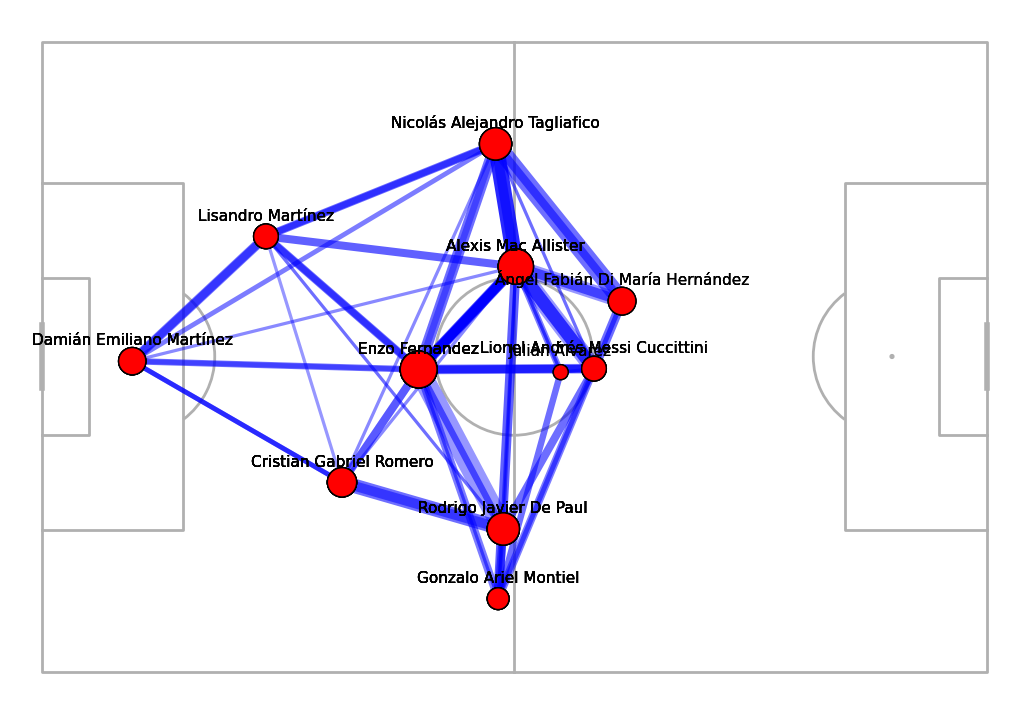

In [60]:
fig, ax = plt.subplots(figsize=(16,9))

pitch = Pitch(pitch_type='statsbomb')

pitch.draw(constrained_layout=False, tight_layout=True, ax=ax)

pitch.scatter(conexiones_totales.x, conexiones_totales.y, ax=ax, s=conexiones_totales.tamaño, ec='black', color='red')

for i, row in conexiones_totales.iterrows():
    color_index = min(i, len(color) - 1)  # Evitar IndexError
    pitch.lines(row['x'], row['y'], row['x_end'], row['y_end'], ax=ax, color=color[color_index], linewidth=row['ancho'], zorder=0.99)

for i, row in conexiones_totales.iterrows():
    ax.text(row.x, row.y-2, row.player_name, color='black', ha='center', fontsize=11)